# Implementing Linear Regression

We will implement the basic Linear Regression model and see the base accuracy. We will even try to use Cross Validtion and see if our result imporved or not. After that we will extend using Lasso Regression and will compare the metrics.
Authors:
- Nooruddin Shaikh
- Milind Sai
- Saurabh Jejurkar
- Kartik Bhargav

In [19]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("Data/final_data.csv")
data.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,83.13,28.71,6.93,49.52,59.76,209.0
1,79.84,28.68,13.85,48.49,97.07,328.0
2,94.52,32.66,24.39,67.39,111.33,514.0
3,135.99,42.08,43.48,75.23,102.70,782.0
4,178.33,35.31,54.56,55.04,107.38,914.0


In [4]:
'''
In our dataset, the target label (the variable that we need to predict) is AQI column.
Rest other columns are feature variable (Independent features).
So our "X" will be all the columns except AQI and "y" will be AQI column
'''

#Splitting Data
X = data.iloc[:, :-1] #Independent features
y = data.iloc[:, -1] #Dependent feature

In [5]:
#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
#Implementing Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of Determination (R^2) for train dataset:  0.8397302056986415
Coefficient of Determination (R^2) for test dataset:  0.856559452332028
Intercept: 22.535107086887876
Slope: [ 1.23204645  0.49477659 10.73456519  0.8661946   0.27317784]


# Visualization of our Regression Model

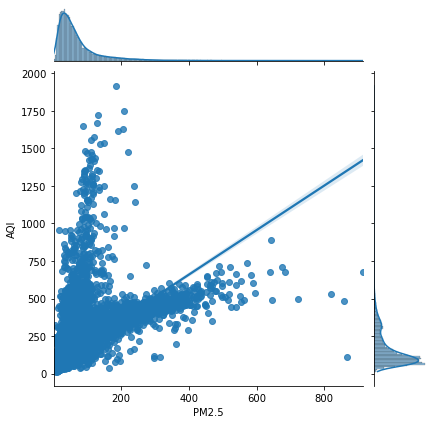

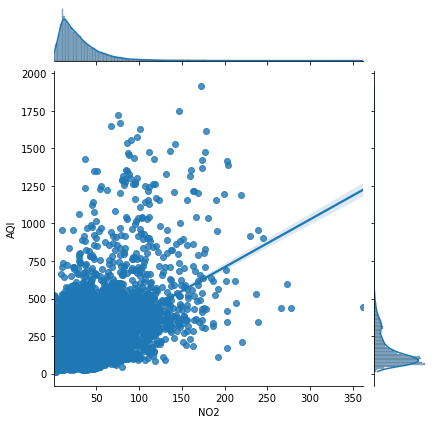

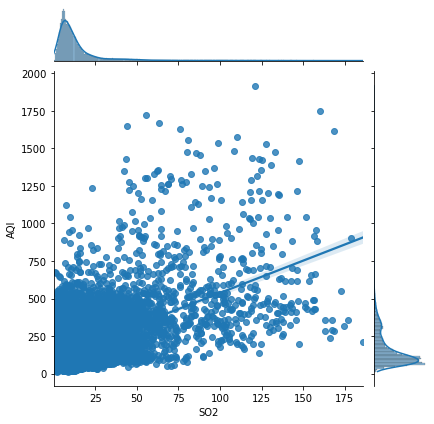

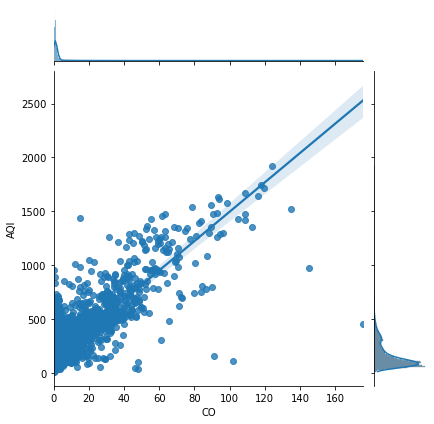

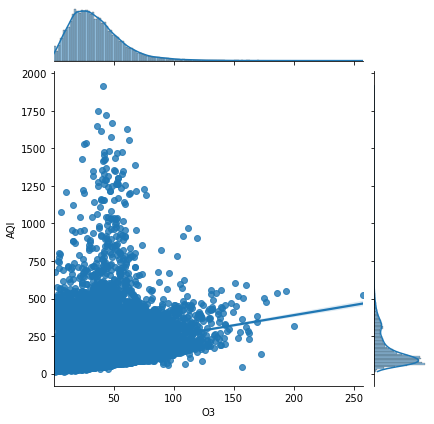

In [9]:
sns.jointplot(x="PM2.5", y="AQI", data=data, kind="reg")
sns.jointplot(x="NO2", y="AQI", data=data, kind="reg")
sns.jointplot(x="SO2", y="AQI", data=data, kind="reg")
sns.jointplot(x="CO", y="AQI", data=data, kind="reg")
sns.jointplot(x="O3", y="AQI", data=data, kind="reg")

# Cross Validation and Evaluation

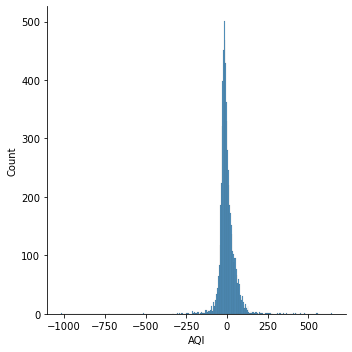

In [10]:
score = cross_val_score(model, X, y, cv=5)
score.mean()
prediction = model.predict(X_test)
sns.displot(y_test-prediction)

In [11]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.514492383621757
MSE: 2683.3309661408234
RMSE: 51.80087804411064


## Insights
- As seen above, dataset is not distributed as Guassian Distribution. This tells us the variation in the datasets.
- PM2.5 and CO is showing positive linear realtion rest others are too scattered.
- Most of the parameter don't follow linear regression and this tells us that Linear regression is not an ideal model for us.

# Implementing Lasso Regression

In [13]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [16]:
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-3778.5339883643983


<AxesSubplot:xlabel='AQI', ylabel='Density'>

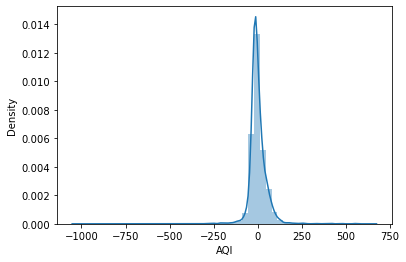

In [17]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

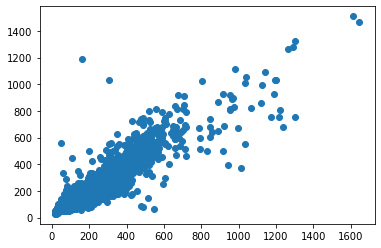

In [20]:
plt.scatter(y_test,prediction)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.233925485056332
MSE: 2672.7420194330493
RMSE: 51.698568833508816


# Insights
- There is not much difference between Linear and Lasso Regression
- The MAE, MSE and RMSE has just changed a little.
- We still can't use the Linear Regression (with Lasso) for our predictions.